<a href="https://colab.research.google.com/github/wuchenyu38/18ma573chenyuwu/blob/master/src/FTCS_Stability.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt

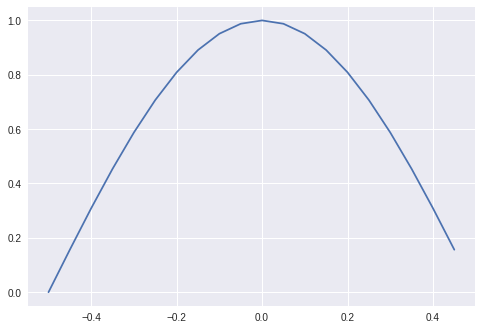

In [2]:
x_range = np.arange(-0.5, 0.5, 0.05)
y_range = np.cos(np.pi * x_range)

plt.plot(x_range,y_range)

We know $s = \frac{\theta}{h^2}$, and given parameter $h = .5$ and $\theta = .25$
So, we have s = 1.
$$
u_0^0 = cos(0) = 1
$$
The first layer should be: 0 1 0.

Then, the whole layer should looks like.
$$0\qquad  1\qquad -3\qquad    6\qquad  -7\qquad  6\qquad  -3\qquad  1\qquad  0$$
$$0\qquad  1\qquad -2\qquad    3\qquad  -2\qquad  1\qquad  0$$
$$0\qquad  1\qquad -1\qquad    1\qquad  0$$
$$0\qquad 1\qquad 0$$

Based on the layer generated above, we can say as n->$\infty$, the value of $u_j^n$ -> $\infty$. So, the FTCS is instable.

In [0]:
phi = lambda x: np.cos(np.pi*x)*(-1/2<x)*(x<1/2)
al = 1 #alpha
dx = 0.5 #space mesh size
dt = 0.25 #time step size
rho=dt*al/(dx**2)  
a = 0
b = 1

In [0]:
def heat_ftcs_test(al,dx,dt,a,f,b,n):
  rho=dt*al/(dx**2)  
  linespace = np.linspace(a-n,b+n,(b+n)-(a-n)+1)
  temp=[]
  max_list=[]
  for i in range(n):
    if i==0:
      temp=linespace
      u_j_list = [f(temp[j]*dx) for j in range((b+n)-(a-n)+1)]
    else:
      u_j_list = [rho*temp[j+1]+(1-2*rho)*temp[j]+rho*temp[j-1] for j in range(1,len(temp)-1)]
    temp=u_j_list
    max_list.append(max(u_j_list))
  return max_list

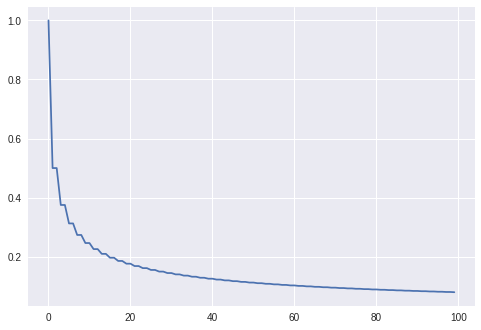

In [11]:
dt=1/8 #set the delta t to .125
u_j_list=heat_ftcs_test(al,dx,dt,a,phi,b,100)
plt.plot(u_j_list)
plt.show()

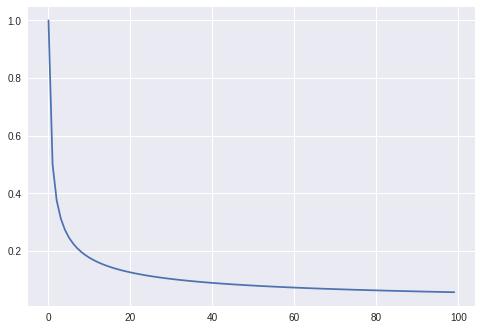

In [12]:
dt=1/16 #set the delta t to .125
u_j_list=heat_ftcs_test(al,dx,dt,a,phi,b,100)
plt.plot(u_j_list)
plt.show()

Based on test above, we can find as $\theta$ less than .125 and approch zero, the FTCS become more stable.